In [1]:
import rpy2
%load_ext rpy2.ipython

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from IPython.display import clear_output

%R install.packages("rjson")
%R library("rjson")
%R install.packages("jsonlite")
%R library("jsonlite")
%R install.packages("sentimentr")
%R library("sentimentr")
%R install.packages("ggplot2")
%R library("ggplot2")
%R install.packages("plyr")
%R library("plyr")
clear_output()

* Scoring sentiments

In [4]:
%%R 
json_data <- read.csv('/content/drive/MyDrive/covid analysis/sentence_2/1005.csv')
head(json_data)

                                                                                                              text
1                         india records new covid cases in past hours lowest daily count in days covid indiacovid 
2                                    jann arden says while covid is very real it wont ever exist on her tv sitcom 
3                                    jann arden says while covid is very real it wont ever exist on her tv sitcom 
4         pdf download and the people stayed home family book coronavirus kids book nature book ebook download at 
5 trying to understand why usa got hit so hard during pandemic while se asias been stable comparatively is it tha 
6              time is running out for schools to apply for federal funding to help slow down the spread of covid 
  index
1     0
2     1
3     2
4     3
5     4
6     5


In [ ]:
%%R
nrow(json_data)

[1] 48317


In [ ]:
%%R
prep_data <- read.csv('/content/drive/MyDrive/covid analysis/preprocessed_2/1005.csv')
head(prep_data)

                                                                                                                 text
1                 ['india', 'record', 'new', 'case', 'past', 'hour', 'lowest', 'daili', 'count', 'day', 'indiacovid']
2                                           ['jann', 'arden', 'say', 'real', 'wont', 'ever', 'exist', 'tv', 'sitcom']
3                                           ['jann', 'arden', 'say', 'real', 'wont', 'ever', 'exist', 'tv', 'sitcom']
4 ['pdf', 'download', 'peopl', 'stay', 'home', 'famili', 'book', 'kid', 'book', 'natur', 'book', 'ebook', 'download']
5                          ['tri', 'understand', 'usa', 'got', 'hit', 'hard', 'se', 'asia', 'stabl', 'compar', 'tha']
6                                       ['time', 'run', 'school', 'appli', 'feder', 'fund', 'help', 'slow', 'spread']
  index
1     0
2     1
3     2
4     3
5     4
6     5


In [ ]:
%%R
nrow(prep_data)

[1] 48317


In [ ]:
%R sentiment=sentiment_by(json_data$text)

,element_id,word_count,sd,ave_sentiment
1,1,15,NaN,0.012910
2,2,16,NaN,0.000000
3,3,16,NaN,0.000000
4,4,17,NaN,0.000000
5,5,20,NaN,0.111803
...,...,...,...,...
48313,48313,18,NaN,-0.058926
48314,48314,17,NaN,-0.363803
48315,48315,10,NaN,0.000000
48316,48316,20,NaN,-0.313050


In [ ]:
%%R 
summary(sentiment$ave_sentiment)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.44485 -0.13363  0.00000  0.01381  0.18353  1.34234 


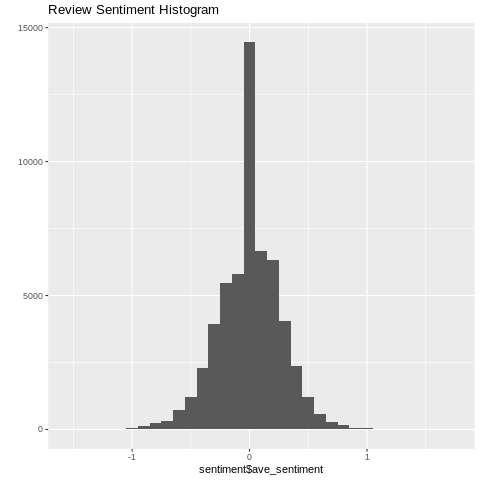

In [ ]:
%%R 
qplot(sentiment$ave_sentiment, geom="histogram", binwidth=0.1, main="Review Sentiment Histogram")

* Visualization

In [5]:
import pandas as pd

created_at_early = pd.date_range("2020-03-22", "2020-04-04", freq = 'D')
score_early = [-0.01904, -0.02322, -0.01927, -0.0085, -0.02187, -0.01658, -0.01922,
               -0.02983, -0.02152, -0.02482, -0.03288, -0.02634, -0.02354, -0.03059]

early = pd.DataFrame(index = created_at_early,  columns = ['average'], data = score_early)
print(early)

            average
2020-03-22 -0.01904
2020-03-23 -0.02322
2020-03-24 -0.01927
2020-03-25 -0.00850
2020-03-26 -0.02187
2020-03-27 -0.01658
2020-03-28 -0.01922
2020-03-29 -0.02983
2020-03-30 -0.02152
2020-03-31 -0.02482
2020-04-01 -0.03288
2020-04-02 -0.02634
2020-04-03 -0.02354
2020-04-04 -0.03059


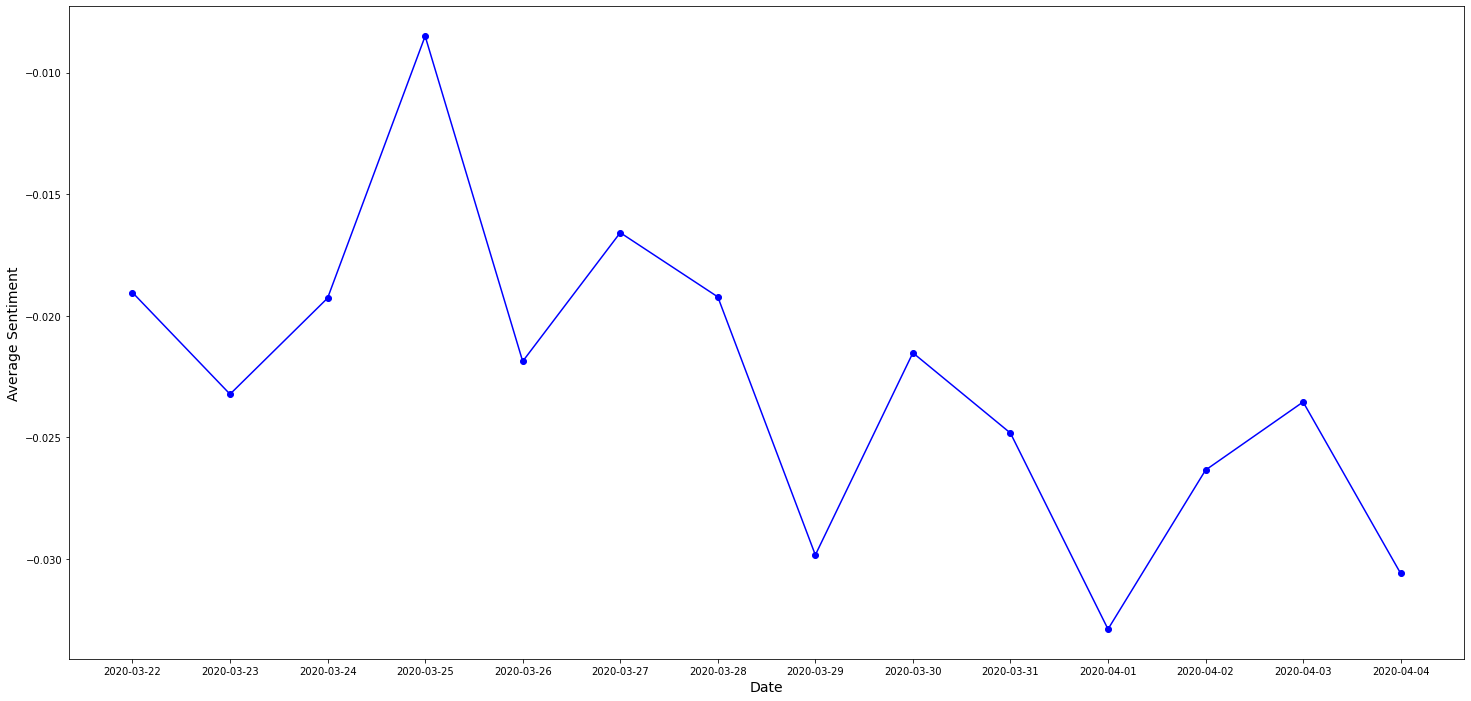

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (25, 12))
plt.plot(early, color = 'blue', marker = 'o')

plt.xticks(created_at_early)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Average Sentiment", fontsize = 14)

plt.show()

In [10]:
created_at_late = pd.date_range("2021-09-22", "2021-10-05", freq = 'D')
score_late = [0.005615, 0.001414, 0.01679, 0.00205, -0.009634, 0.008733, 0.002306,
              -0.001476, -0.003051, 0.0004905, -0.00712, -0.008068, 0.006999, 0.01381]

late = pd.DataFrame(index = created_at_early, columns = ['average'], data = score_late)
print(late)

             average
2020-03-22  0.005615
2020-03-23  0.001414
2020-03-24  0.016790
2020-03-25  0.002050
2020-03-26 -0.009634
2020-03-27  0.008733
2020-03-28  0.002306
2020-03-29 -0.001476
2020-03-30 -0.003051
2020-03-31  0.000491
2020-04-01 -0.007120
2020-04-02 -0.008068
2020-04-03  0.006999
2020-04-04  0.013810


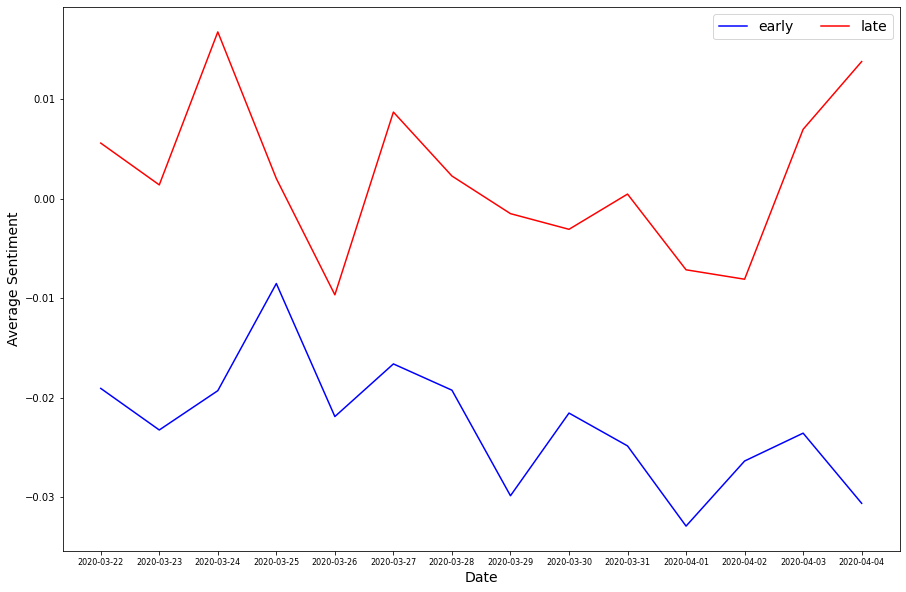

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 10))
plt.plot(early, color = 'blue', label = 'early')
plt.plot(late, color = 'red', label = 'late')

plt.xticks(created_at_early, fontsize = 8)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Average Sentiment", fontsize = 14)
plt.legend(loc='best', ncol=2, fontsize = 14)
plt.show()

* Classify positive, negative, and neutral

In [ ]:
%%R
sentiment <- sentiment[, 'ave_sentiment']
head(sentiment)

   ave_sentiment
1:    0.01290994
2:    0.00000000
3:    0.00000000
4:    0.00000000
5:    0.11180340
6:   -0.05735393


In [ ]:
%%R
final <- cbind(prep_data$text, sentiment)
head(final)

                                                                                                                    V1
1:                 ['india', 'record', 'new', 'case', 'past', 'hour', 'lowest', 'daili', 'count', 'day', 'indiacovid']
2:                                           ['jann', 'arden', 'say', 'real', 'wont', 'ever', 'exist', 'tv', 'sitcom']
3:                                           ['jann', 'arden', 'say', 'real', 'wont', 'ever', 'exist', 'tv', 'sitcom']
4: ['pdf', 'download', 'peopl', 'stay', 'home', 'famili', 'book', 'kid', 'book', 'natur', 'book', 'ebook', 'download']
5:                          ['tri', 'understand', 'usa', 'got', 'hit', 'hard', 'se', 'asia', 'stabl', 'compar', 'tha']
6:                                       ['time', 'run', 'school', 'appli', 'feder', 'fund', 'help', 'slow', 'spread']
   ave_sentiment
1:    0.01290994
2:    0.00000000
3:    0.00000000
4:    0.00000000
5:    0.11180340
6:   -0.05735393


In [ ]:
%%R
positive <- final[final$ave_sentiment > 0,]
write.csv(positive, '/content/drive/MyDrive/covid analysis/positive_2/1005.csv')
nrow(positive)

[1] 21533


In [ ]:
%%R
negative <- final[final$ave_sentiment < 0,]
write.csv(negative, '/content/drive/MyDrive/covid analysis/negative_2/1005.csv')
nrow(negative)

[1] 17923


In [ ]:
%%R
neutral <- final[final$ave_sentiment == 0,]
write.csv(neutral, '/content/drive/MyDrive/covid analysis/neutral_2/1005.csv')
nrow(neutral)

[1] 8861
